## Queries on Number of Points Inside a Circle
You are given an array points where points[i] = [xi, yi] is the coordinates of the ith point on a 2D plane. Multiple points can have the same coordinates.

You are also given an array queries where queries[j] = [xj, yj, rj] describes a circle centered at (xj, yj) with a radius of rj.

For each query queries[j], compute the number of points inside the jth circle. Points on the border of the circle are considered inside.

Return an array answer, where answer[j] is the answer to the jth query.  
Input: points = [[1,3],[3,3],[5,3],[2,2]], queries = [[2,3,1],[4,3,1],[1,1,2]]  
Output: [3,2,2]  
Explanation: The points and circles are shown above.  
queries[0] is the green circle, queries[1] is the red circle, and queries[2] is the blue circle. 
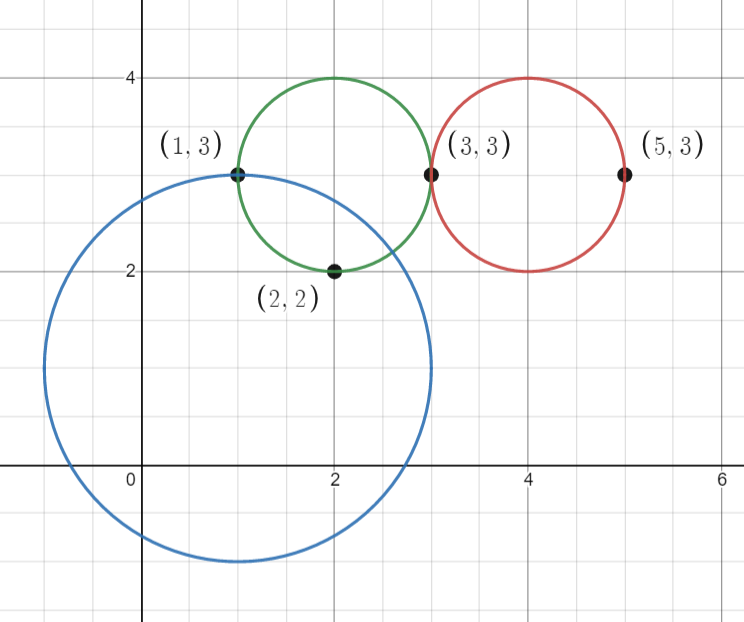

In [1]:
class Solution_map(object):    
    def point_in_query(self, point, query) -> int:
        return int(((point[0] - query[0]) ** 2) + ((point[1] - query[1]) ** 2) <= query[2] ** 2)
    
    def points_count(self, points, query) -> int:
        return sum(list(map(lambda point: self.point_in_query(point, query), points)))

    def countPoints(self, points, queries) -> list:
        return list(map(lambda query: self.points_count(points, query), queries))

In [2]:
points = [[1,3],[3,3],[5,3],[2,2]]
queries = [[2,3,1],[4,3,1],[1,1,2]]

In [3]:
s = Solution_map()
s.countPoints(points, queries)

[3, 2, 2]

## Number of Laser Beams in a Bank
Anti-theft security devices are activated inside a bank. You are given a 0-indexed binary string array bank representing the floor plan of the bank, which is an m x n 2D matrix. bank[i] represents the ith row, consisting of '0's and '1's. '0' means the cell is empty, while'1' means the cell has a security device.

There is one laser beam between any two security devices if both conditions are met:

The two devices are located on two different rows: r1 and r2, where r1 < r2.
For each row i where r1 < i < r2, there are no security devices in the ith row.
Laser beams are independent, i.e., one beam does not interfere nor join with another.

Return the total number of laser beams in the bank.

Input: bank = ["011001","000000","010100","001000"]
Output: 8
Explanation: Between each of the following device pairs, there is one beam. In total, there are 8 beams:
 * bank[0][1] -- bank[2][1]
 * bank[0][1] -- bank[2][3]
 * bank[0][2] -- bank[2][1]
 * bank[0][2] -- bank[2][3]
 * bank[0][5] -- bank[2][1]
 * bank[0][5] -- bank[2][3]
 * bank[2][1] -- bank[3][2]
 * bank[2][3] -- bank[3][2]
Note that there is no beam between any device on the 0th row with any on the 3rd row.
This is because the 2nd row contains security devices, which breaks the second condition.
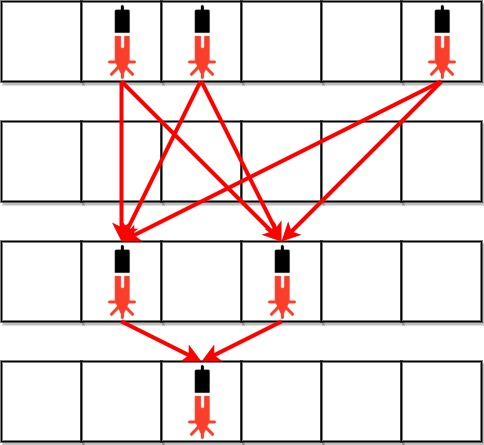

In [4]:
bank = ["011001","000000","010100","001000"]

In [9]:
class Solution:
    def numberOfBeams(self, bank):
        banks_count = 0 
        list_banks = [x.count("1") for x in bank if x.count("1")] 
        for i in range(len(list_banks)-1):
            banks_count += (list_banks[i]*list_banks[i+1])
        return banks_count

In [10]:
s = Solution()
s.numberOfBeams(bank)

8

## Minimum Operations to Make Array Equal
You have an array arr of length n where arr[i] = (2 * i) + 1 for all valid values of i (i.e., 0 <= i < n).

In one operation, you can select two indices x and y where 0 <= x, y < n and subtract 1 from arr[x] and add 1 to arr[y] (i.e., perform arr[x] -=1 and arr[y] += 1). The goal is to make all the elements of the array equal. It is guaranteed that all the elements of the array can be made equal using some operations.

Given an integer n, the length of the array, return the minimum number of operations needed to make all the elements of arr equal.

Input: n = 3  
Output: 2  
Explanation: arr = [1, 3, 5]  
First operation choose x = 2 and y = 0, this leads arr to be [2, 3, 4]  
In the second operation choose x = 2 and y = 0 again, thus arr = [3, 3, 3].

In [14]:
class Solution:
    def minOperations(self, n: int) -> int:
        return sum(list(range(n-1, 0, -2)))

In [15]:
n = 3
s = Solution()
s.minOperations(n)

2

## Count Number of Distinct Integers After Reverse Operations
You are given an array nums consisting of positive integers.

You have to take each integer in the array, reverse its digits, and add it to the end of the array. You should apply this operation to the original integers in nums.

Return the number of distinct integers in the final array.  
Input: nums = [1,13,10,12,31]  
Output: 6  
Explanation: After including the reverse of each number, the resulting array is [1,13,10,12,31,1,31,1,21,13].  
The reversed integers that were added to the end of the array are underlined. Note that for the integer 10, after reversing it, it becomes 01 which is just 1.  
The number of distinct integers in this array is 6 (The numbers 1, 10, 12, 13, 21, and 31).

In [16]:
class Solution:
    def countDistinctIntegers(self, nums) -> int:
        return len(set(nums + [int(str(x)[::-1]) for x in nums]))

In [17]:
nums = [1,13,10,12,31]
s = Solution()
s.countDistinctIntegers(nums)

6

## Maximum Number of Coins You Can Get
There are 3n piles of coins of varying size, you and your friends will take piles of coins as follows:

In each step, you will choose any 3 piles of coins (not necessarily consecutive).
Of your choice, Alice will pick the pile with the maximum number of coins.
You will pick the next pile with the maximum number of coins.
Your friend Bob will pick the last pile.
Repeat until there are no more piles of coins.
Given an array of integers piles where piles[i] is the number of coins in the ith pile.

Return the maximum number of coins that you can have.
Input: piles = [2,4,1,2,7,8]  
Output: 9  
Explanation: Choose the triplet (2, 7, 8), Alice Pick the pile with 8 coins, you the pile with 7 coins and Bob the last one.  
Choose the triplet (1, 2, 4), Alice Pick the pile with 4 coins, you the pile with 2 coins and Bob the last one.
The maximum number of coins which you can have are: 7 + 2 = 9.
On the other hand if we choose this arrangement (1, 2, 8), (2, 4, 7) you only get 2 + 4 = 6 coins which is not optimal.

In [19]:
class Solution:
    def maxCoins(self, piles) -> int:
        piles.sort()
        return sum(piles[-2:len(piles)//3 - 1:-2])

In [20]:
piles = [2,4,1,2,7,8]
s = Solution()
s.maxCoins(piles)

9

## Find the Winner of the Circular Game
There are n friends that are playing a game. The friends are sitting in a circle and are numbered from 1 to n in clockwise order. More formally, moving clockwise from the ith friend brings you to the (i+1)th friend for 1 <= i < n, and moving clockwise from the nth friend brings you to the 1st friend.

The rules of the game are as follows:

Start at the 1st friend.
Count the next k friends in the clockwise direction including the friend you started at. The counting wraps around the circle and may count some friends more than once.
The last friend you counted leaves the circle and loses the game.
If there is still more than one friend in the circle, go back to step 2 starting from the friend immediately clockwise of the friend who just lost and repeat.
Else, the last friend in the circle wins the game.
Given the number of friends, n, and an integer k, return the winner of the game.

In [21]:
class Solution:
    def recurion_player(self, players_list, k):
        i=k
        if (len(players_list) < k) & (k%len(players_list)!=0):
            i = k%len(players_list)
        elif (len(players_list) < k) & (k%len(players_list)==0):
            i = len(players_list)

        if len(players_list) == 1:
            return players_list[0]
        else:
            return self.recurion_player(players_list[i:] + players_list[:i-1], k)

    def findTheWinner(self, n: int, k: int) -> int:
        return self.recurion_player(list(range(1,n+1)), k)
        

In [22]:
s = Solution()
s.findTheWinner(8,8)

4

In [23]:
s.findTheWinner(5, 2)

3

## Find Triangular Sum of an Array
You are given a 0-indexed integer array nums, where nums[i] is a digit between 0 and 9 (inclusive).

The triangular sum of nums is the value of the only element present in nums after the following process terminates:

Let nums comprise of n elements. If n == 1, end the process. Otherwise, create a new 0-indexed integer array newNums of length n - 1.
For each index i, where 0 <= i < n - 1, assign the value of newNums[i] as (nums[i] + nums[i+1]) % 10, where % denotes modulo operator.
Replace the array nums with newNums.
Repeat the entire process starting from step 1.
Return the triangular sum of nums.
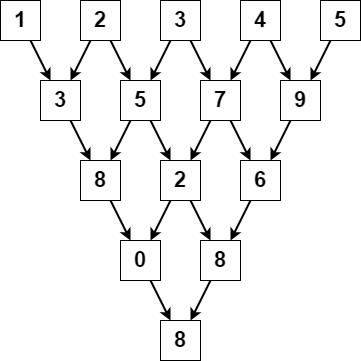

In [26]:
class Solution:
    def triangularSum(self, nums):
        if (len(nums)==1):
            return nums[0]
        else:
            return self.triangularSum([(x+nums[i+1])%10 for i, x in enumerate(nums[:-1])])

In [27]:
nums = [1,2,3,4,5]
s = Solution()
s.triangularSum(nums)

8

## Path In Zigzag Labelled Binary Tree
In an infinite binary tree where every node has two children, the nodes are labelled in row order.

In the odd numbered rows (ie., the first, third, fifth,...), the labelling is left to right, while in the even numbered rows (second, fourth, sixth,...), the labelling is right to left.

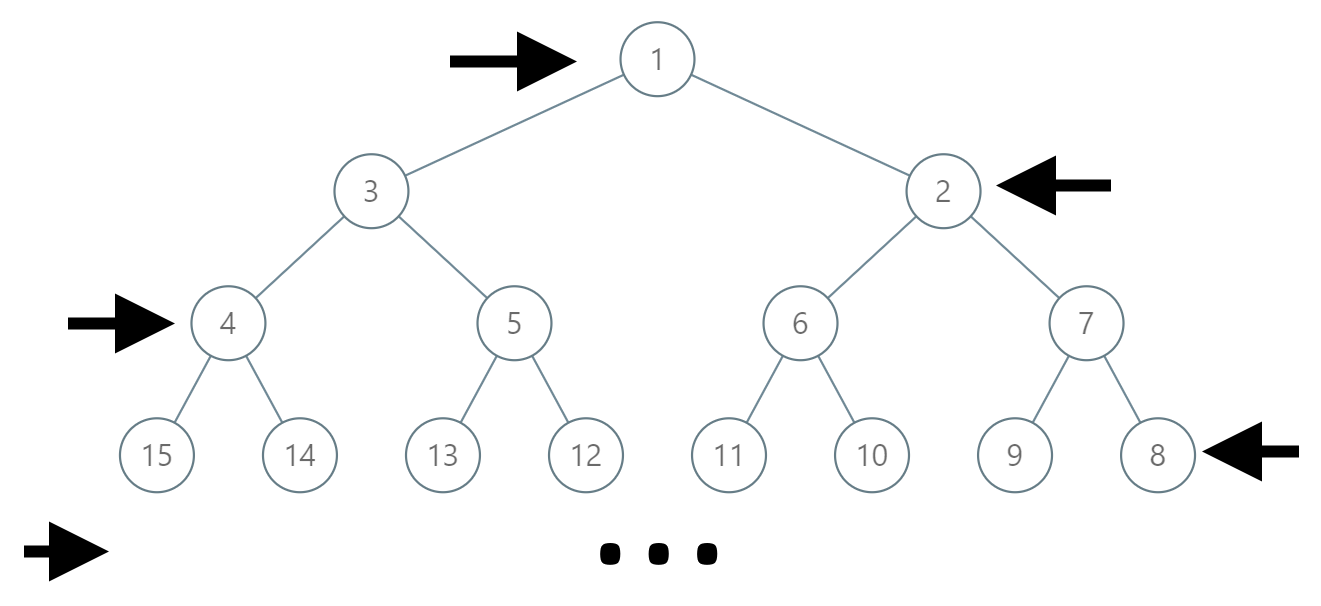

Given the label of a node in this tree, return the labels in the path from the root of the tree to the node with that label.

In [28]:
class Solution:
    def invert_bit(self, s):
        return str(-1*(int(s)-1))

    def recursion_fun(self, s, output_list):
        if s == 1:
            return output_list
        else:
            new = int('1' + ''.join(map(self.invert_bit, bin(s).replace("0b", "")[1:-1])), 2)
            output_list.append(new)
            return self.recursion_fun(new, output_list)

    def pathInZigZagTree(self, label):
        output_list = [label]
        return self.recursion_fun(label, output_list)[::-1]

In [29]:
label = 14
s = Solution()
s.pathInZigZagTree(label)

[1, 3, 4, 14]

## Factorial Trailing Zeroes
Given an integer n, return the number of trailing zeroes in n!.

Note that n! = n * (n - 1) * (n - 2) * ... * 3 * 2 * 1.

In [35]:
import numpy as np

In [36]:
class Solution:
    def trailingZeroes(self, n):
        i = n
        count = 0
        while i>1:
            count+=i//5
            i = i//5
        return count
        

In [37]:
n = 20
np.math.factorial(n)

2432902008176640000

In [38]:
s = Solution()
s.trailingZeroes(n)

4

## Complex Number Multiplication
A complex number can be represented as a string on the form "real+imaginaryi" where:

real is the real part and is an integer in the range [-100, 100].  
imaginary is the imaginary part and is an integer in the range [-100, 100].  
i2 == -1.  
Given two complex numbers num1 and num2 as strings, return a string of the complex number that represents their multiplications.

In [39]:
class Solution:
    def complexNumberMultiply(self, num1: str, num2: str) -> str:
        a1, b1 = [int(x) for x in num1[:-1].split('+')]
        a2, b2 = [int(x) for x in num2[:-1].split('+')] 
        return f'{(a1*a2-b1*b2)}' + '+' + f'{(a1*b2+a2*b1)}' + 'i'

In [40]:
num1 = "1+1i"
num2 = "1+1i"

In [41]:
s = Solution()
s.complexNumberMultiply(num1, num2)

'0+2i'

## Rotate Image
You are given an n x n 2D matrix representing an image, rotate the image by 90 degrees (clockwise).

You have to rotate the image in-place, which means you have to modify the input 2D matrix directly. DO NOT allocate another 2D matrix and do the rotation.

In [42]:
class Solution(object):
    def rotate(self, matrix):
        """
        :type matrix: List[List[int]]
        :rtype: None Do not return anything, modify matrix in-place instead.
        """
        length = len(matrix)
        for i in range(length):
            for j in range(i, length):
                matrix[i][j], matrix[j][i] = matrix[j][i], matrix[i][j]
        
        for i in range(length):
            matrix[i] = matrix[i][::-1]

In [43]:
matrix = [[1,2,3],[4,5,6],[7,8,9]]
s = Solution()

In [44]:
s.rotate(matrix)

In [45]:
matrix

[[7, 4, 1], [8, 5, 2], [9, 6, 3]]

## Egg Drop With 2 Eggs and N Floors
You are given two identical eggs and you have access to a building with n floors labeled from 1 to n.

You know that there exists a floor f where 0 <= f <= n such that any egg dropped at a floor higher than f will break, and any egg dropped at or below floor f will not break.

In each move, you may take an unbroken egg and drop it from any floor x (where 1 <= x <= n). If the egg breaks, you can no longer use it. However, if the egg does not break, you may reuse it in future moves.

Return the minimum number of moves that you need to determine with certainty what the value of f is.

In [46]:
class Solution(object):
    def twoEggDrop(self, n):
        """
        :type n: int
        :rtype: int
        """
        diff = 1
        while (n-diff) > 0:
            n=n-diff
            diff+=1
        return diff  
    

In [47]:
n = 100
s = Solution()
s.twoEggDrop(100)

14

## Stone Game
Alice and Bob play a game with piles of stones. There are an even number of piles arranged in a row, and each pile has a positive integer number of stones piles[i].

The objective of the game is to end with the most stones. The total number of stones across all the piles is odd, so there are no ties.

Alice and Bob take turns, with Alice starting first. Each turn, a player takes the entire pile of stones either from the beginning or from the end of the row. This continues until there are no more piles left, at which point the person with the most stones wins.

Assuming Alice and Bob play optimally, return true if Alice wins the game, or false if Bob wins.

In [48]:
class Solution:
    def stoneGame(self, piles) -> bool:
        n = len(piles)
        f = [0] * n
        
        for i in range(n - 1, -1, -1):
            for j in range(i + 1, n):
                f[j] = max(piles[i] - f[j], piles[j] - f[j - 1])
        
        return f[n - 1] > 0

In [49]:
piles = [8,9,7,6,7,6]
s = Solution()
s.stoneGame(piles)

True

## Ugly Number
An ugly number is a positive integer whose prime factors are limited to 2, 3, and 5.

Given an integer n, return true if n is an ugly number.

In [56]:
#Input: n = 6
#Output: true
#Explanation: 6 = 2 × 3

In [57]:
class Solution:
    def isUgly(self, num: int) -> bool:
        if num == 0:
            return False
        while num%5==0:
            num=num/5
        while num%3==0:
            num=num/3
        while num%2==0:
            num=num/2
        return num==1

In [58]:
n = 220
s = Solution()
s.isUgly(n)

False

## Ugly Number II
An ugly number is a positive integer whose prime factors are limited to 2, 3, and 5.

Given an integer n, return the nth ugly number.

In [53]:
class Solution:
    def nthUglyNumber(self, n: int) -> int:
        ugly_list = [1]  
        count = i = j = k = 0
        while count < n-1:
            if count == n:
                return(ugly_list[-1]) 
        
            next_val = min(ugly_list[i]*2, ugly_list[j]*3,ugly_list[k]*5)
            if next_val == ugly_list[i]*2:
                i+=1
            if next_val == ugly_list[j]*3:
                j+=1
            if next_val == ugly_list[k]*5:
                k+=1
            count+=1
            ugly_list.append(next_val)
        return ugly_list[-1]

In [54]:
n= 10
s = Solution()
s.nthUglyNumber(n)

12

## Adding Two Negabinary Numbers
Given two numbers arr1 and arr2 in base -2, return the result of adding them together.  

Each number is given in array format:  as an array of 0s and 1s, from most significant bit to least significant bit.  For example, arr = [1,1,0,1] represents the number (-2)^3 + (-2)^2 + (-2)^0 = -3.  A number arr in array, format is also guaranteed to have no leading zeros: either arr == [0] or arr[0] == 1.  

Return the result of adding arr1 and arr2 in the same format: as an array of 0s and 1s with no leading zeros.

In [59]:
class Solution(object):
    def addNegabinary(self, arr1, arr2):
        """
        :type arr1: List[int]
        :type arr2: List[int]
        :rtype: List[int]
        """
        res = []
        carry = 0
        while arr1 or arr2 or carry:
            carry += (arr1 or [0]).pop() + (arr2 or [0]).pop()
            res.append(carry&1)
            carry = -(carry >> 1)
        while (res[-1] == 0) and (len(res)>1):
            res.pop()
        return res[::-1]

In [61]:
arr1 = [1,1,1,1,1]
arr2 = [1,0,1]
s = Solution()
s.addNegabinary(arr1, arr2)

[1, 0, 0, 0, 0]

## Maximum Number of Groups Entering a Competition

You are given a positive integer array grades which represents the grades of students in a university. You would like to enter all these students into a competition in ordered non-empty groups, such that the ordering meets the following conditions:  

The sum of the grades of students in the ith group is less than the sum of the grades of students in the (i + 1)th group, for all groups (except the last).  
The total number of students in the ith group is less than the total number of students in the (i + 1)th group, for all groups (except the last).  
Return the maximum number of groups that can be formed.  

In [64]:
class Solution(object):
    def maximumGroups(self, grades):
        """
        :type grades: List[int]
        :rtype: int
        """
        count_students = len(grades)
        count_groups = 1
        while count_students>count_groups:
            count_groups+=1
            count_students-=count_groups
        if count_students == 0:
            count_groups-=1
        return count_groups

In [65]:
grades = [13,44,41,49,22,22,32,35,13,10,20,43,49]
s = Solution()
s.maximumGroups(grades)

4

In [66]:
class Solution(object):
    def maximumGroups(self, grades):
        """
        :type grades: List[int]
        :rtype: int
        """
        count_students = len(grades)
        if count_students <=2:
            return 1
        count_groups = 2
        while (2+count_groups)*(count_groups+1)/2 - count_students<= 0:
            count_groups+=1
        return count_groups 

In [67]:
grades = [13,44,41,49,22,22,32,35,13,10,20,43,49]
s = Solution()
s.maximumGroups(grades)

4

## Maximum Score From Removing Stones
You are playing a solitaire game with three piles of stones of sizes a​​​​​​, b,​​​​​​ and c​​​​​​ respectively. Each turn you choose two different non-empty piles, take one stone from each, and add 1 point to your score. The game stops when there are fewer than two non-empty piles (meaning there are no more available moves).

Given three integers a​​​​​, b,​​​​​ and c​​​​​, return the maximum score you can get.

In [69]:
class Solution(object):
    def maximumScore(self, a, b, c):
        list_piles = [a, b, c]
        score = 0
        for i in range(1, min(list_piles)+1):
            list_piles.sort()
            list_piles[0]-=1
            list_piles[-1]-=1
            score += 1
        score += min(list_piles[1:])
        return score

In [70]:
a = 4
b = 4
c = 6
s = Solution()
s.maximumScore(a,b,c)

7

In [71]:
class Solution(object):
    def maximumScore(self, a, b, c):
        (a, b, c) = sorted((a, b, c))
        if (a+b) < c:
            return a+b
        else:
            return (a+b+c)//2

In [72]:
a = 4
b = 4
c = 6
s = Solution()
s.maximumScore(a,b,c)

7

## K Closest Points to Origin
Given an array of points where points[i] = [xi, yi] represents a point on the X-Y plane and an integer k, return the k closest points to the origin (0, 0).  

The distance between two points on the X-Y plane is the Euclidean distance (i.e., √(x1 - x2)2 + (y1 - y2)2).  

You may return the answer in any order. The answer is guaranteed to be unique (except for the order that it is in).

In [73]:
class Solution(object):
    def euclid_dist_0(self, p1):
        return ((p1[0])**2 + (p1[1])**2)

    def kClosest(self, points, k):
        """
        :type points: List[List[int]]
        :type k: int
        :rtype: List[List[int]]
        """        
        res = sorted(list(zip(list(map(self.euclid_dist_0, points)), points)))
        while len(res)>k:
            res.pop()  
        return [res[i][1] for i in range(k)]

In [74]:
points = [[3,3],[5,-1],[-2,4]]
k = 2
s = Solution()
s.kClosest(points, k)

[[3, 3], [-2, 4]]

In [75]:
class Solution(object):
    def kClosest(self, points, k):
        """
        :type points: List[List[int]]
        :type k: int
        :rtype: List[List[int]]
        """
        heap_points = []
        for x,y in points:
            dist = (x**2 + y**2)
            if len(heap_points)<k:
                heapq.heappush(heap_points, (-dist, [x, y]))
            else:
                heapq.heappushpop(heap_points, (-dist, [x, y]))
        return [heap_points[i][1] for i  in range(k)]

In [77]:
import heapq

points = [[3,3],[5,-1],[-2,4]]
k = 2
s = Solution()
s.kClosest(points, k)

[[-2, 4], [3, 3]]

### Check if Number is a Sum of Powers of Three
Given an integer n, return true if it is possible to represent n as the sum of distinct powers of three. Otherwise, return false.  

An integer y is a power of three if there exists an integer x such that y == 3x.  
Input: n = 12  
Output: true  
Explanation: 12 = 31 + 32

In [78]:
class Solution(object):
    def checkPowersOfThree(self, n):
        """
        :type n: int
        :rtype: bool
        """
        pow_list = []
        while n > 0:
            pow=0
            num = n
            if num%3==0:
                while num%3==0:
                    num/=3
                    pow+=1
            elif 0 not in pow_list:
                num-=1
                pow = 0
            else:
                break
            if pow not in pow_list:
                n = n - 3**pow
                pow_list.append(pow)
            else:
                break
        return not bool(n)

In [80]:
n=12
s = Solution()
s.checkPowersOfThree(n)

True

In [81]:
class Solution:
    def checkPowersOfThree(self, n: int) -> bool:
        while n:
            n, rem = divmod(n, 3)
            if rem == 2:
                return False
        return True

In [82]:
n=12
s = Solution()
s.checkPowersOfThree(n)

True

## Simplified Fractions
Given an integer n, return a list of all simplified fractions between 0 and 1 (exclusive) such that the denominator is less-than-or-equal-to n. You can return the answer in any order.

In [83]:
class Solution:
    def simplifiedFractions(self, n):
        output_arr = []
        for i in range(2, n+1):
            output_arr.append(f'1/{i}')
        for i in range(2, n+1):
            for j in range(i+1, n+1):
                if math.gcd(i,j)== 1:
                    output_arr.append(f'{i}/{j}')
        return output_arr

In [86]:
import math
s = Solution()
s.simplifiedFractions(4)

['1/2', '1/3', '1/4', '2/3', '3/4']

## Sum of Absolute Differences in a Sorted Array
You are given an integer array nums sorted in non-decreasing order.

Build and return an integer array result with the same length as nums such that result[i] is equal to the summation of absolute differences between nums[i] and all the other elements in the array.

In other words, result[i] is equal to sum(|nums[i]-nums[j]|) where 0 <= j < nums.length and j != i (0-indexed).
Input: nums = [2,3,5]  
Output: [4,3,5]  
Explanation: Assuming the arrays are 0-indexed, then  
result[0] = |2-2| + |2-3| + |2-5| = 0 + 1 + 3 = 4,  
result[1] = |3-2| + |3-3| + |3-5| = 1 + 0 + 2 = 3,  
result[2] = |5-2| + |5-3| + |5-5| = 3 + 2 + 0 = 5.  

In [87]:
class Solution:
    def diff_array(self, num, nums):
        return sum([abs(num-x) for x in nums])

    def getSumAbsoluteDifferences(self, nums):
        return [self.diff_array(num, nums) for num in nums]

In [88]:
nums = [2,4,5,7,8]
s = Solution()
s.getSumAbsoluteDifferences(nums)

[16, 10, 9, 11, 14]

## Escape The Ghosts
You are playing a simplified PAC-MAN game on an infinite 2-D grid. You start at the point [0, 0], and you are given a destination point target = [xtarget, ytarget] that you are trying to get to. There are several ghosts on the map with their starting positions given as a 2D array ghosts, where ghosts[i] = [xi, yi] represents the starting position of the ith ghost. All inputs are integral coordinates.

Each turn, you and all the ghosts may independently choose to either move 1 unit in any of the four cardinal directions: north, east, south, or west, or stay still. All actions happen simultaneously.

You escape if and only if you can reach the target before any ghost reaches you. If you reach any square (including the target) at the same time as a ghost, it does not count as an escape.

Return true if it is possible to escape regardless of how the ghosts move, otherwise return false.

In [92]:
class Solution:
    def possible_moves(self, coor):
        pm = [[coor[0] - 1, coor[1]], [coor[0] + 1, coor[1]], [coor[0], coor[1] - 1], [coor[0], coor[1] + 1]]    
        return pm

    def manh_dist(self, coor1, coor2):
        return (abs(coor2[0] - coor1[0]) + abs(coor2[1] - coor1[1]))
    
    def all_moves(self, coor1, coor2):
        my_possible_moves = self.possible_moves(coor1)
        my_dist = [self.manh_dist(x, coor2) for x in my_possible_moves]
        my_dist = list(zip(my_dist, my_possible_moves))
        return my_dist

    def all_moves_ghost(self, coor1, coor2, coor3):
        my_possible_moves = self.possible_moves(coor1)
        my_dist = [self.manh_dist(x, coor2) + self.manh_dist(x, coor3) for x in my_possible_moves]
        my_dist = list(zip(my_dist, my_possible_moves))
        return my_dist

    def escapeGhosts(self, ghosts, target):
        me = [0,0]
        flag = False
        win = False
        if me == target:
            flag = True
            win = True
        while flag == False:
            my_dist = self.all_moves(me, target)
            my_dist.sort()
            if my_dist[0][0] != 0:
                me = my_dist[0][1]
            else:
                me = my_dist[0][1]
                win = True
            for i in range(len(ghosts)):
                if ghosts[i] == me:
                    flag = True
                gh_dist = self.all_moves_ghost(ghosts[i], me, target)
                gh_dist.sort()
                if gh_dist[0][1] != me:
                    ghosts[i] = gh_dist[0][1]
                else:
                    flag = True
            if win & flag:
                win = False
                flag = True
            elif win:
                flag = True  
        return win  

In [93]:
class Solution:
    def manh_dist(self, coor1, coor2):
        return (abs(coor2[0] - coor1[0]) + abs(coor2[1] - coor1[1]))

    def escapeGhosts(self, ghosts, target):
        me = [0,0]
        dist_list = [self.manh_dist(x, target) for x in ghosts]
        my_dist = self.manh_dist(me, target)
        return my_dist < min(dist_list)


In [94]:
### The shortest sopution 
class Solution:
    def escapeGhosts(self, ghosts, target):
        manh_dist = lambda x,y: abs(x[0] - y[0]) + abs(x[1] - y[1])
        return manh_dist([0,0], target) < min([manh_dist(g, target)for g in ghosts])

### Convert to Base -2
Given an integer n, return a binary string representing its representation in base -2.  

Note that the returned string should not have leading zeros unless the string is "0".  
Input: n = 2  
Output: "110"  
Explantion: (-2)2 + (-2)1 = 2

In [95]:
class Solution:
    def baseNeg2(self, n: int) -> str:
        bin_str = ""
        if n == 0:
            return '0'
        while n != 1:
            if n&1 == 0:
                n = (-1) * (n >> 1)
                bin_str = bin_str + '0'
            else:
                n = (-1) * ((n-1)>>1)
                bin_str = bin_str + '1'
        return '1'+bin_str[::-1]

In [96]:
n = 2
s = Solution()
s.baseNeg2(n)

'110'

## Minimum Moves to Equal Array Elements II
Given an integer array nums of size n, return the minimum number of moves required to make all array elements equal.  

In one move, you can increment or decrement an element of the array by 1.  

Test cases are designed so that the answer will fit in a 32-bit integer.  
Input: nums = [1,2,3]  
Output: 2  
Explanation:  
Only two moves are needed (remember each move increments or decrements one element):  
[1,2,3]  =>  [2,2,3]  =>  [2,2,2]

In [98]:
class Solution:
    def minMoves2(self, nums) -> int:
        magic_num = int(sum(nums)/len(nums))
        magic_sum = sum([abs(x-magic_num) for x in nums])
        flag = True
        n = 1000
        while flag:
            if sum([abs(x-(magic_num + 1*n)) for x in nums]) < magic_sum:
                magic_num += (1 * n)
                magic_sum = sum([abs(x-(magic_num)) for x in nums])
            elif sum([abs(x-(magic_num - 1*n)) for x in nums]) < magic_sum:
                magic_num -= (1 * n)
                magic_sum = sum([abs(x-(magic_num)) for x in nums])
            elif n > 0:
                n = n>>1
            else:
                flag=False
        return sum([abs(x-magic_num) for x in nums])

In [99]:
nums = [1,2,5,8,0]
s = Solution()
s.minMoves2(nums)

12

In [100]:
### or just find median
class Solution:
    def minMoves2(self, nums):
        m = sorted(nums)[len(nums)//2] # median
        return sum(abs(x-m) for x in nums)

In [101]:
nums = [1,2,5,8,0]
s = Solution()
s.minMoves2(nums)

12

## Count Odd Numbers in an Interval Range
Given two non-negative integers low and high. Return the count of odd numbers between low and high (inclusive).

In [102]:
class Solution:
    def countOdds(self, low: int, high: int) -> int:
        diff = (high - low)>>1
        if (low&1) or (high&1):
            diff+=1
        return diff

In [103]:
low = 3
high = 9
s = Solution()
s.countOdds(low, high)

4

## Roman to Integer
Roman numerals are represented by seven different symbols: I, V, X, L, C, D and M.
Symbol       Value  
I             1  
V             5  
X             10  
L             50  
C             100  
D             500  
M             1000  
I can be placed before V (5) and X (10) to make 4 and 9.  
X can be placed before L (50) and C (100) to make 40 and 90.   
C can be placed before D (500) and M (1000) to make 400 and 900.  
Given a roman numeral, convert it to an integer.


In [104]:
class Solution:
    def romanToInt(self, s: str) -> int:
        roman_dict = {
            'I': 1,
            'V': 5,
            'X': 10,
            'L': 50,
            'C': 100,
            'D': 500,
            'M': 1000
        }
        roman_replace = {
            'IV': 'IIII',
            'IX': 'VIIII',
            'XL': 'XXXX',
            'XC': 'LXXXX',
            'CD': 'CCCC',
            'CM': 'DCCCC'
        }
        replace_fun = lambda s, pattern: s.replace(pattern, roman_replace[pattern])
        sum_fun = lambda sum_el, elem: sum_el + roman_dict[elem]
        for i in roman_replace:
            s = replace_fun(s, i)
        sum_all = 0  
        for i in s[::-1]:
            sum_all = sum_fun(sum_all, i) 
        return sum_all  

In [105]:
string = "MCMXCIV"
s = Solution()
s.romanToInt(string)
#1994

1994

In [106]:
class Solution:
    def romanToInt(self, s: str) -> int:
        roman_dict = {
            'I': 1,
            'V': 5,
            'X': 10,
            'L': 50,
            'C': 100,
            'D': 500,
            'M': 1000
        }
        current = 0
        sum_all = 0
        for i in s[::-1]:
            if roman_dict[i] >= current:
                current = roman_dict[i]
                sum_all += roman_dict[i]
            else:
                current = roman_dict[i]
                sum_all -= roman_dict[i]
        return sum_all  

In [107]:
string = "MCMXCIV"
s = Solution()
s.romanToInt(string)

1994

## Longest Common Prefix
Write a function to find the longest common prefix string amongst an array of strings.  

If there is no common prefix, return an empty string "".  

Input: strs = ["flower","flow","flight"]  
Output: "fl"

In [108]:
class Solution:
    def longestCommonPrefix(self, strs):
        min_len = min([len(a) for a in strs])
        count_pref = 0
        if min_len == 0:
            return ''
        flag = True
        while count_pref<min_len and flag:
            if len(set([i[count_pref] for i in strs])) == 1:
                count_pref+=1
            else:
                flag = False
        return strs[0][:count_pref]

In [109]:
strs = ["flower","flow","flight"]
s = Solution()
s.longestCommonPrefix(strs)

'fl'

In [110]:
class Solution:
    def longestCommonPrefix(self, strs):
        length_list = list(map(len, (map(set, zip(*strs)))))
        count_pref = 0
        flag = True
        while flag and length_list:
            if length_list[0]==1:
                count_pref+=1
                length_list.pop(0)
            else:
                flag = False
        return strs[0][:count_pref]

In [111]:
strs = ["flower","flow","flight"]
s = Solution()
s.longestCommonPrefix(strs)

'fl'

## Valid Parentheses
Given a string s containing just the characters '(', ')', '{', '}', '[' and ']', determine if the input string is valid.

An input string is valid if:

Open brackets must be closed by the same type of brackets.
Open brackets must be closed in the correct order.
Every close bracket has a corresponding open bracket of the same type.

In [112]:
class Solution:
    def isValid(self, s: str) -> bool:
        bracket_dic = {
                        ')': '(',
                        '}': '{',
                        ']': '['
                    }
        list_check = []
        for i in s:
            if i in bracket_dic.values():
                list_check.append(i)
            if i in bracket_dic.keys() and list_check:
                if list_check[-1] == bracket_dic[i]:
                    list_check.pop()
                else:
                    break
            elif i in bracket_dic.keys(): list_check.append(i)
        return not bool(list_check)

In [114]:
string_brackets = '(([])[]{{}})()'
s = Solution()
s.isValid(string_brackets)

True

In [115]:
class Solution:
    def isValid(self, s: str) -> bool:
        bracket_dic = {
                        '(': ')',
                        '{': '}',
                        '[': ']'
                        }
        list_check = []
        for i in s:
            if i in bracket_dic:
                list_check.append(i)
            elif not list_check or bracket_dic[list_check.pop()] != i:
                return False
        
        return not bool(list_check)

In [116]:
string_brackets = '(([])[]{{}})()'
s = Solution()
s.isValid(string_brackets)

True

In [117]:
class Solution:
    def isValid(self, s: str) -> bool:
        flag = True
        while flag:
            if ('()' in s) or ('[]' in s) or ('{}' in s):
                s = s.replace('()', '')
                s = s.replace('[]', '')
                s = s.replace('{}', '')
            else:
                flag = False    
        
        return not bool(s)

In [118]:
string_brackets = '(([])[]{{}})()'
s = Solution()
s.isValid(string_brackets)

True

## Merge Two Sorted Lists
You are given the heads of two sorted linked lists list1 and list2.  

Merge the two lists in a one sorted list. The list should be made by splicing together the nodes of the first two lists.  

Return the head of the merged linked list.

In [119]:
class Solution(object):
    def mergeTwoLists(self, list1, list2):
        """
        :type list1: Optional[ListNode]
        :type list2: Optional[ListNode]
        :rtype: Optional[ListNode]
        """
        output_list = []
        while list1 and list2:
            if list1[0] < list2[0]:
                output_list.append(list1.pop(0))
            else:
                output_list.append(list2.pop(0))
        return output_list + list1 + list2

In [120]:
list1 = [1,10]
list2 = [2,3,4,5,6]
s = Solution()
s.mergeTwoLists(list1, list2)

[1, 2, 3, 4, 5, 6, 10]

## Number Complement
The complement of an integer is the integer you get when you flip all the 0's to 1's and all the 1's to 0's in its binary representation.

For example, The integer 5 is "101" in binary and its complement is "010" which is the integer 2.
Given an integer num, return its complement.

In [121]:
class Solution(object):
    def findComplement(self, num):
        """
        :type num: int
        :rtype: int
        """
        pow_list = []
        output = 0
        while num>0:
            pow_list.append(1 - (num&1))
            num = num >>1
    
        for i, val in enumerate(pow_list):
            if val:
                output += 2**i
        return output

In [122]:
n=5
s = Solution()
s.findComplement(n)

2

In [123]:
class Solution(object):
    def findComplement(self, num):
        """
        :type num: int
        :rtype: int
        """
        output = 0
        counter = 0
        while num>0:
            if (1 - num&1):
                output += 2**counter
            counter += 1
            num = num>>1
        return output

In [124]:
n=5
s = Solution()
s.findComplement(n)

2

## Bulb Switcher
There are n bulbs that are initially off. You first turn on all the bulbs, then you turn off every second bulb.  

On the third round, you toggle every third bulb (turning on if it's off or turning off if it's on). For the ith round, you toggle every i bulb. For the nth round, you only toggle the last bulb.  

Return the number of bulbs that are on after n rounds.  
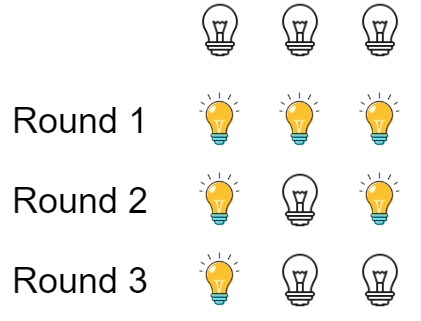

In [125]:
### It's a real work solution, kek 
class Solution(object):
    def bulbSwitch(self, n):
        """
        :type n: int
        :rtype: int
        """
        return int(n**(0.5))

In [126]:
n = 3
s = Solution()
s.bulbSwitch(n)

1

## Long Pressed Name
Your friend is typing his name into a keyboard. Sometimes, when typing a character c, the key might get long pressed, and the character will be typed 1 or more times.  

You examine the typed characters of the keyboard. Return True if it is possible that it was your friends name, with some characters (possibly none) being long pressed.  
Input: name = "alex", typed = "aaleex"  
Output: true  
Explanation: 'a' and 'e' in 'alex' were long pressed.  

In [127]:
class Solution(object):
    def count_chars(self, char, s):
        count = 0
        while s[0] == char:
            count+=1
            s=s[1:]
            if not s:
                break
        return count

    def isLongPressedName(self, name, typed):
        """
        :type name: str
        :type typed: str
        :rtype: bool
        """
        while (name and typed):
            i=name[0]
            count_name = self.count_chars(i, name)
            count_types = self.count_chars(i, typed)
            if count_name <= count_types:
                name = name[count_name:]
                typed = typed[count_types:]
            else:
                return False 
        return not bool(typed or name)

In [129]:
name = "leelee"
typed = "lleeelee"
s = Solution()
s.isLongPressedName(name, typed)

True

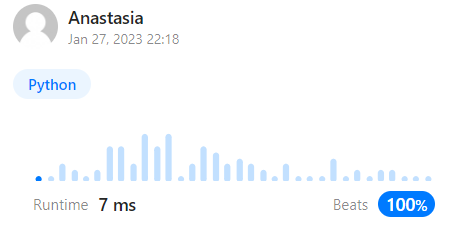

## Plus One
You are given a large integer represented as an integer array digits, where each digits[i] is the ith digit of the integer. The digits are ordered from most significant to least significant in left-to-right order. The large integer does not contain any leading 0's.  
Increment the large integer by one and return the resulting array of digits.

In [130]:
## Recursion
class Solution(object):
    def plus_one(self, array, arr_9):
        if not array:
            return [1] + arr_9
        elif array[-1] == 9:
            arr_9.append(0)
            return self.plus_one(array[:-1], arr_9)
        else:
            if array:
                array[-1] += 1
                return array + arr_9
    def plusOne(self, digits):
        """
        :type digits: List[int]
        :rtype: List[int]
        """

        arr_9 = []
        return self.plus_one(digits, arr_9)

In [131]:
digits = [1, 1, 2, 3, 3]
s = Solution()
s.plusOne(digits)

[1, 1, 2, 3, 4]

In [132]:
class Solution(object):
    def plusOne(self, digits):
        """
        :type digits: List[int]
        :rtype: List[int]
        """

        arr_9 = []
        flag = True
        while digits:
            if digits[-1] == 9:
                arr_9.append(0)
                digits.pop()
            else:
                break
        
        if (not digits and arr_9):
            return [1] + arr_9
        else:
            digits[-1] += 1
            return digits + arr_9

In [134]:
digits = [1, 1, 2, 3, 9]
s = Solution()
s.plusOne(digits)

[1, 1, 2, 4, 0]

## Two Sum
Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.  

You may assume that each input would have exactly one solution, and you may not use the same element twice.  

You can return the answer in any order.  

In [135]:
class Solution(object):
    def twoSum(self, nums, target):
        """
        :type nums: List[int]
        :type target: int
        :rtype: List[int]
        """
        for i, val_i in enumerate(nums[:-1]):
            for j, val_j in enumerate(nums[i+1:]):
                if val_i + val_j == target:
                    return[i,j+i+1]
        return []

In [136]:
nums = [2,7,11,15]
target = 9
s = Solution()
s.twoSum(nums, target)

[0, 1]

In [137]:
class Solution(object):
    def twoSum(self, nums, target):
        """
        :type nums: List[int]
        :type target: int
        :rtype: List[int]
        """
        dict_diff = {}
        for i, val in enumerate(nums):
            diff = target - val
            if val in dict_diff:
                return[i, dict_diff[val]]
            else:
                dict_diff[diff] = i

In [138]:
nums = [2,7,11,15]
target = 9
s = Solution()
s.twoSum(nums, target)

[1, 0]

## Remove Duplicates from Sorted Array
Given an integer array nums sorted in non-decreasing order, remove the duplicates in-place such that each unique element appears only once. The relative order of the elements should be kept the same.  

Since it is impossible to change the length of the array in some languages, you must instead have the result be placed in the first part of the array nums. More formally, if there are k elements after removing the duplicates, then the first k elements of nums should hold the final result. It does not matter what you leave beyond the first k elements.  

Return k after placing the final result in the first k slots of nums.  

Do not allocate extra space for another array. You must do this by modifying the input array in-place with O(1)

In [139]:
class Solution(object):
    def removeDuplicates(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        flag = True
        i = 1
        while (i < len(nums)) and flag:
            if nums[i] == '_':
                flag=False
                break
            elif nums[i] == nums[i-1]:
                nums.pop(i)
                nums.append('_')
            else:
                i+=1
        if len(nums) == 1:
            i = 1
        return i

In [142]:
nums = [1,3,5,5,9]
s = Solution()
s.removeDuplicates(nums)

4

## Sqrt(x)
Given a non-negative integer x, return the square root of x rounded down to the nearest integer. The returned integer should be non-negative as well.  

You must not use any built-in exponent function or operator.  

For example, do not use pow(x, 0.5) in c++ or x ** 0.5 in python.  

In [145]:
class Solution(object):
    def mySqrt(self, x):
        """
        :type x: int
        :rtype: int
        """
        l = 0
        r = x
        if x == 1:
            return 1
        while l <= r:
            mid = (l+r) // 2
            if mid * mid <= x < (mid+1)*(mid+1):
                return mid
            elif mid*mid > x:
                r=mid
            else:
                l = mid

In [147]:
s = Solution()
s.mySqrt(12)

3

In [148]:
## RECURSIVE SOLUTION
class Solution(object):
    def recursive_sqrt(self, l, r, x):
        print(l, r, x)
        mid = (l + r)//2
        if mid * mid <= x < (mid+1)*(mid+1):
            return mid
        elif mid*mid > x:
            return (self.recursive_sqrt(l, mid, x))
        else:
            return (self.recursive_sqrt(mid, r, x))


    def mySqrt(self, x):
        """
        :type x: int
        :rtype: int
        """
        l = 0
        r = x
        if x == 1:
            return 1
        else:
            return self.recursive_sqrt(l, r, x)

In [149]:
s = Solution()
s.mySqrt(12)

0 12 12
0 6 12


3

## Pow(x, n)
Implement pow(x, n), which calculates x raised to the power n (i.e., xn).

In [150]:
class Solution(object):
    def fact_searching(self, n):
        if n > 0:
            return n * self.fact_searching(n-1)
        else:
            return 1  

    def climbStairs(self, n):
        """
        :type n: int
        :rtype: int
        """
        if n&1 == 1: r = 1
        else: r = 0
        l = n >> 1
        sum_permutation = 0
        while l>= 0:
            sum_permutation += self.fact_searching(l+r)/(self.fact_searching(l) * self.fact_searching(r))
            l -=1
            r+=2
        return sum_permutation 


In [151]:
s = Solution()
for i in range(10):
    print(s.climbStairs(i))

1.0
1.0
2.0
3.0
5.0
8.0
13.0
21.0
34.0
55.0


In [152]:
# It's a fibonacci sequence ^_^

In [153]:
def fibonacci_seq(n):
    if n == 1:
        return 1
    elif n == 2:
        return 2
    else:
        return fibonacci_seq(n-1) + fibonacci_seq(n-2)

In [154]:
class Solution(object):
    def climbStairs(self, n):
        """
        :type n: int
        :rtype: int
        """
        a=[1,2]
        if n == 1:
            return 1
        for i in range(n-2):
            sum_a = a[0] + a[1]
            a[0] = a[1]
            a[1] = sum_a
        return a[-1]


In [155]:
n = 10
s = Solution()
s.climbStairs(n)

89

## Valid Palindrome
A phrase is a palindrome if, after converting all uppercase letters into lowercase letters and removing all non-alphanumeric characters, it reads the same forward and backward. Alphanumeric characters include letters and numbers.  

Given a string s, return true if it is a palindrome, or false otherwise.

In [156]:
class Solution(object):
    def isPalindrome(self, s):
        """
        :type s: str
        :rtype: bool
        """
        i = 0
        j = len(s) - 1
        while i < j:
            if not s[i].isalnum():
                i+=1
            elif not s[j].isalnum():
                j-=1
            elif s[i].lower() != s[j].lower():
                return False
            else:
                i+=1
                j-=1
        return True

In [161]:
string = 'qWe.ewq!'
s = Solution()
s.isPalindrome(string)

True

## Single Number
Given a non-empty array of integers nums, every element appears twice except for one. Find that single one.

You must implement a solution with a linear runtime complexity and use only constant extra space.

In [162]:
class Solution(object):
    def singleNumber(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        dic = {}
        for i in nums:
            if i in dic:
                dic.pop(i)
            else:
                dic[i] = i
        return dic.popitem()[0]

In [163]:
nums = [2,2,8,8,9,10,10]
s = Solution()
s.singleNumber(nums)

9

In [164]:
class Solution(object):
    def singleNumber(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        nums.sort()
        for i in range(0, len(nums)-1, 2):
            if nums[i] != nums[i+1]:
                return nums[i]
        return nums[-1]

In [165]:
nums = [2,2,8,8,9,10,10]
s = Solution()
s.singleNumber(nums)

9

In [168]:
from functools import reduce

In [169]:
class Solution(object):
    def singleNumber(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        return reduce(lambda x, y: x ^ y, nums)

In [170]:
nums = [2,2,8,8,9,10,10]
s = Solution()
s.singleNumber(nums)

9

## Happy Number
Write an algorithm to determine if a number n is happy.  

A happy number is a number defined by the following process:  

Starting with any positive integer, replace the number by the sum of the squares of its digits.  
Repeat the process until the number equals 1 (where it will stay), or it loops endlessly in a cycle which does not include 1.  
Those numbers for which this process ends in 1 are happy.  
Return true if n is a happy number, and false if not.

In [171]:
class Solution(object):
    def squares_digits(self, num):
        if num == 0:
            return 0
        else:
            return int(num%10)*int(num%10) + self.squares_digits(num//10)
    def isHappy(self, n):
        """
        :type n: int
        :rtype: bool
        """
        arr_n = {n}
        while n!= 1:
            n=self.squares_digits(n)
            if n in arr_n:
                return False
            else:
                arr_n.add(n)
        return True

In [172]:
s = Solution()
s.isHappy(23)

True

## Contains Duplicate
Given an integer array nums, return true if any value appears at least twice in the array, and return false if every element is distinct.

In [173]:
class Solution(object):
    def containsDuplicate(self, nums):
        """
        :type nums: List[int]
        :rtype: bool
        """
        return not(len(set(nums)) == len(nums))

In [175]:
num = [1,1,2,2,3,4,4,5,5]
s = Solution()
s.containsDuplicate(num)

True

## Power of Three
Given an integer n, return true if it is a power of three. Otherwise, return false.  

An integer n is a power of three, if there exists an integer x such that n == 3x.  

In [176]:
class Solution(object):
    def isPowerOfThree(self, n):
        """
        :type n: int
        :rtype: bool
        """
        if n < 1:
            return False
        while(n % 3 == 0):
            n /= 3
        return n == 1

In [179]:
s = Solution()
s.isPowerOfThree(27)

True

## Pascal's Triangle
Given an integer numRows, return the first numRows of Pascal's triangle.  

In Pascal's triangle, each number is the sum of the two numbers directly above it as shown:  

In [180]:
class Solution(object):
    def create_raw(self, arr):
        new_arr = []
        for i in range(1, len(arr)):
            new_arr.append(arr[i] + arr[i-1])
        return [1] + new_arr + [1]

    def generate(self, numRows):
        """
        :type numRows: int
        :rtype: List[List[int]]
        """
        final_arr = [[1]]
        for i in range(numRows-1):
            final_arr.append(self.create_raw(final_arr[-1]))
        return final_arr

In [181]:
s = Solution()
s.generate(4)

[[1], [1, 1], [1, 2, 1], [1, 3, 3, 1]]

## Longest Substring Without Repeating Characters
Given a string s, find the length of the longest substring without repeating characters.

In [182]:
class Solution(object):
    def lengthOfLongestSubstring(self, s):
        """
        :type s: str
        :rtype: int
        """
        l = 0
        dic_s = {}
        max_length = 0
        for r, ch in enumerate(s):
            if ch in dic_s:
                l = max(l, dic_s[ch]+1)
            max_length = max(max_length, r-l+1)
            dic_s[ch] = r
        return max_length

In [184]:
string = 'qwerty11'
s = Solution()
s.lengthOfLongestSubstring(string)

7

## Reverse String
Write a function that reverses a string. The input string is given as an array of characters s.

You must do this by modifying the input array in-place with O(1) extra memory.

In [211]:
class Solution(object):
    def reverseString(self, s):
        """
        :type s: List[str]
        :rtype: None Do not return anything, modify s in-place instead.
        """
        s[:] = s[::-1]

In [213]:
string = ["h","e","l","l","o"]
s = Solution()
s.reverseString(string)

In [214]:
string

['o', 'l', 'l', 'e', 'h']

## Move Zeroes
Given an integer array nums, move all 0's to the end of it while maintaining the relative order of the non-zero elements.

Note that you must do this in-place without making a copy of the array.

In [215]:
class Solution(object):
    def moveZeroes(self, nums):
        """
        :type nums: List[int]
        :rtype: None Do not return anything, modify nums in-place instead.
        """
        current = 0
        for n in range(len(nums)):
            if nums[current] == 0:
                nums.pop(current)
                nums.append(0)
            else:
                current += 1

In [218]:
nums = [1, 0, 3, 0, 4, 5, 0]
s = Solution()
s.moveZeroes(nums)
print(nums)

[1, 3, 4, 5, 0, 0, 0]


In [219]:
class Solution(object):
    def moveZeroes(self, nums):
        """
        :type nums: List[int]
        :rtype: None Do not return anything, modify nums in-place instead.
        """
        current = 0
        for n in range(len(nums)):
            if nums[n] != 0:
                nums[n], nums[current] = nums[current], nums[n]
                current += 1

In [220]:
nums = [1, 0, 3, 0, 4, 5, 0]
s = Solution()
s.moveZeroes(nums)
print(nums)

[1, 3, 4, 5, 0, 0, 0]


## Intersection of Two Arrays II
Given two integer arrays nums1 and nums2, return an array of their intersection. Each element in the result must appear as many times as it shows in both arrays and you may return the result in any order.

 

In [221]:
class Solution(object):
    def intersect(self, nums1, nums2):
        """
        :type nums1: List[int]
        :type nums2: List[int]
        :rtype: List[int]
        """
        output_arr = []
        for n in nums1:
            if n in nums2:
                nums2.remove(n)
                output_arr.append(n)
        return output_arr

In [224]:
nums1 = [1,2,2,3]
nums2 = [2,3,3,5]
s = Solution()
s.intersect(nums1, nums2)

[2, 3]

## Fizz Buzz
Given an integer n, return a string array answer (1-indexed) where:  

answer[i] == "FizzBuzz" if i is divisible by 3 and 5.  
answer[i] == "Fizz" if i is divisible by 3.  
answer[i] == "Buzz" if i is divisible by 5.  
answer[i] == i (as a string) if none of the above conditions are true.

In [225]:
class Solution(object):
    def fizzBuzz(self, n):
        """
        :type n: int
        :rtype: List[str]
        """
        output_arr = []
        for i in range(1, n+1):
            if i%3==0 and i%5!=0:
                output_arr.append('Fizz')
            elif i%5==0 and i%3!=0:
                output_arr.append('Buzz')
            elif i%3==0 and i%5==0:
                output_arr.append('FizzBuzz')
            else:
                output_arr.append(str(i))
        return output_arr

In [226]:
s = Solution()
s.fizzBuzz(14)

['1',
 '2',
 'Fizz',
 '4',
 'Buzz',
 'Fizz',
 '7',
 '8',
 'Fizz',
 'Buzz',
 '11',
 'Fizz',
 '13',
 '14']

## Letter Combinations of a Phone Number
Given a string containing digits from 2-9 inclusive, return all possible letter combinations that the number could represent. Return the answer in any order.  

A mapping of digits to letters (just like on the telephone buttons) is given below. Note that 1 does not map to any letters.  
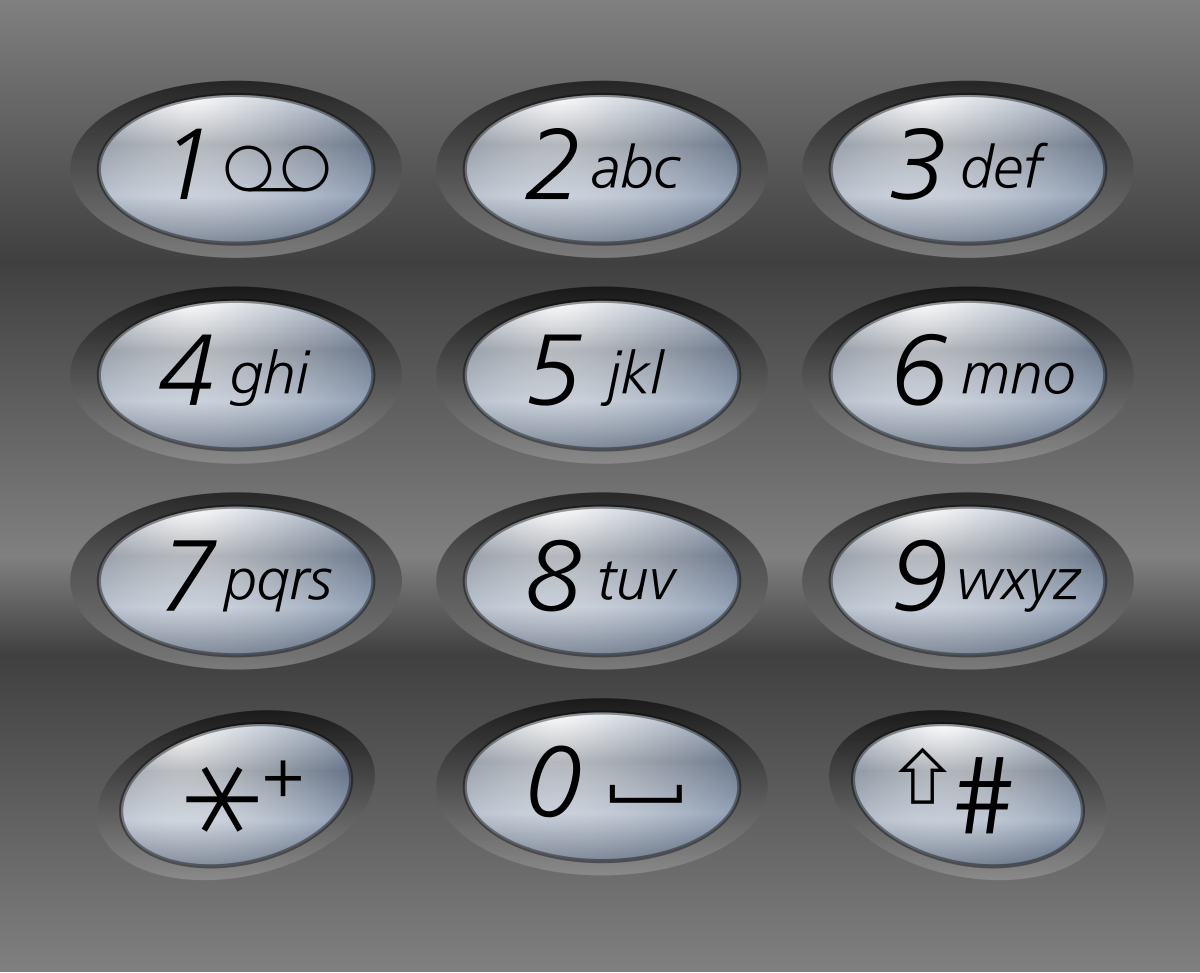

In [227]:
import itertools

In [228]:
class Solution(object):
    def letterCombinations(self, digits):
        """
        :type digits: str
        :rtype: List[str]
        """
        digit_list = ['', '', 'abc', 'def', 'ghi', 'jkl', 'mno', 'pqrs', 'tuv', 'wxyz']
        strs = []
        for i in digits:
            strs.append(digit_list[int(i)])
        output_arr = []
        if strs:
            output_arr = [''.join(s) for s in itertools.product(*strs)]
        return output_arr

In [230]:
n = '23'
s = Solution()
s.letterCombinations(n)

['ad', 'ae', 'af', 'bd', 'be', 'bf', 'cd', 'ce', 'cf']

In [231]:
class Solution(object):
    def list_merge_char(self, list1, ch):  
        list2 = list1[::]
        for i, val in enumerate(list1):
            list2[i] = val+ch
        return list2

    def letterCombinations(self, digits):
        """
        :type digits: str
        :rtype: List[str]
        """
        dict_dig = {'2':'abc', '3':'def', '4':'ghi', '5':'jkl', '6':'mno', '7':'pqrs', '8':'tuv', '9':'wxyz'}
        digit_list = []
        final_list = [] 
        for i in digits:
            digit_list.append(dict_dig[i])

        while digit_list:
            output_list = []
            if not final_list:
                final_list.extend([s for s in digit_list[0]])
            else:
                for s in digit_list[0]:
                    output_list.extend(self.list_merge_char(final_list, s))
                final_list = output_list
            digit_list.pop(0)
        return final_list

In [232]:
n = '23'
s = Solution()
s.letterCombinations(n)

['ad', 'bd', 'cd', 'ae', 'be', 'ce', 'af', 'bf', 'cf']

## Find the Index of the First Occurrence in a String
Given two strings needle and haystack, return the index of the first occurrence of needle in haystack, or -1 if needle is not part of haystack.

In [233]:
class Solution(object):
    def strStr(self, haystack, needle):
        """
        :type haystack: str
        :type needle: str
        :rtype: int
        """
        index = -1
        min_len = len(needle)
        for i in range(0, len(haystack) - min_len+1):
            if haystack[i: i+min_len] == needle:
                index = i
                break
        return index

In [236]:
haystack = "123leetcode"
needle = "leetco"
s = Solution()
s.strStr(haystack, needle)

3

## Repeated Substring Pattern
Given a string s, check if it can be constructed by taking a substring of it and appending multiple copies of the substring together.

In [237]:
class Solution(object):
    def repeatedSubstringPattern(self, s):
        """
        :type s: str
        :rtype: bool
        """
        if not s:
            return -1
        double_string = (s + s)[1:-1].find(s)
        return double_string != -1

In [238]:
string = 'abcabcabc'
s = Solution()
s.repeatedSubstringPattern(string)

True

In [239]:
class Solution(object):
    def check_substring(self, s, sub):
        for i in range(0, len(s), len(sub)):
            if s[i:i+len(sub)] != sub:
                return False
        return True
    def repeatedSubstringPattern(self, s):
        """
        :type s: str
        :rtype: bool
        """
        flag = False
        for i in range(1 + (len(s) >> 1)):
            if s[0:i] == s[i:i+i] and s[0:i]:
                flag = self.check_substring(s, s[0:i])
                if flag:
                    break
        return flag

In [240]:
string = 'abcabcabc'
s = Solution()
s.repeatedSubstringPattern(string)

True

## User Input
A user interface contains two types of user input controls: TextInput, which accepts all characters and NumericInput, which accepts only digits.

Implement the class TextInput that contains:

Method add(self, character) - adds the given character to the current value
Method get_value(self) - returns the current value
Implement the class NumericInput that:

Inherits TextInput
Overrides the add method so that each non-numeric character is ignored
For example, the following code should output "10":

input = NumericInput()
input.add("1")
input.add("a")
input.add("0")
print(input.get_value())

In [241]:
class TextInput:
    def __init__(self, s=''):
        self.s = s
    def add(self, character):
        self.s = self.s + character
    def get_value(self):
        return self.s
    
class NumericInput(TextInput):
    def add(self, character):
        if character.isnumeric():
            self.s = self.s + character
        else:
            pass

In [242]:
input = NumericInput()
input.add("1")
input.add("a")
input.add("0")
print(input.get_value())

10


## Two Sum
Write a function that, when passed a list and a target sum, returns, efficiently with respect to time used, two distinct zero-based indices of any two of the numbers, whose sum is equal to the target sum. If there are no two numbers, the function should return None.

For example, find_two_sum([3, 1, 5, 7, 5, 9], 10) should return a single tuple containing any of the following pairs of indices:

0 and 3 (or 3 and 0) as 3 + 7 = 10  
1 and 5 (or 5 and 1) as 1 + 9 = 10  
2 and 4 (or 4 and 2) as 5 + 5 = 10  

In [243]:
def find_two_sum(numbers, target_sum):
    """
    :param numbers: (list of ints) The list of numbers.
    :param target_sum: (int) The required target sum.
    :returns: (a tuple of 2 ints) The indices of the two elements whose sum is equal to target_sum
    """
    dict_sum = {}
    for i, val in enumerate(numbers):
        if (val) not in dict_sum:
            dict_sum[target_sum - val] = i
        else:
            return dict_sum[val], i
    return None

In [244]:
find_two_sum([3, 1, 5, 7, 5, 9], 10)

(0, 3)

## File Owners
Implement a group_by_owners function that:

Accepts a dictionary containing the file owner name for each file name.
Returns a dictionary containing a list of file names for each owner name, in any order.  
For example, for dictionary {'Input.txt': 'Randy', 'Code.py': 'Stan', 'Output.txt': 'Randy'} the group_by_owners function should return {'Randy': ['Input.txt', 'Output.txt'], 'Stan': ['Code.py']}.

In [245]:
def group_by_owners(files):
    output_dic = {}
    for i, val in files.items():
        if val in output_dic:
            output_dic[val].append(val)
        else:
            output_dic[val] = [i]
    return output_dic

In [246]:
files = {
        'Input.txt': 'Randy',
        'Code.py': 'Stan',
        'Output.txt': 'Randy'
}

In [247]:
print(group_by_owners(files))

{'Randy': ['Input.txt', 'Randy'], 'Stan': ['Code.py']}


## Ice Cream Machine
Implement the IceCreamMachine's scoops method so that it returns all combinations of one ingredient and one topping. If there are no ingredients or toppings, the method should return an empty list.

For example, IceCreamMachine(["vanilla", "chocolate"], ["chocolate sauce"]).scoops() should return [['vanilla', 'chocolate sauce'], ['chocolate', 'chocolate sauce']].

In [248]:
class IceCreamMachine:
    
    def __init__(self, ingredients, toppings):
        self.ingredients = ingredients
        self.toppings = toppings
        
    def scoops(self):
        output_list = []
        for ingr in self.ingredients:
            for top in self.toppings:
                output_list.append([ingr, top])
        return output_list

In [249]:
machine = IceCreamMachine(["vanilla", "chocolate"], ["chocolate sauce"])
print(machine.scoops())

[['vanilla', 'chocolate sauce'], ['chocolate', 'chocolate sauce']]


In [250]:
import itertools

In [251]:
class IceCreamMachine:
    
    def __init__(self, ingredients, toppings):
        self.ingredients = ingredients
        self.toppings = toppings
        
    def scoops(self):
        return [list(tup) for tup in itertools.product(self.ingredients, self.toppings)]

In [252]:
machine = IceCreamMachine(["vanilla", "chocolate"], ["vanilla sauce"])
print(machine.scoops())

[['vanilla', 'vanilla sauce'], ['chocolate', 'vanilla sauce']]


## Song
A playlist is considered a repeating playlist if any of the songs contain a reference to a previous song in the playlist. Otherwise, the playlist will end with the last song which points to None.

Implement a function is_in_repeating_playlist that, efficiently with respect to time used, returns true if a playlist is repeating or false if it is not.

For example, the following code prints "True" as both songs point to each other.

In [253]:
class Song:
    def __init__(self, name):
        self.name = name
        self.next = None

    def next_song(self, song):
        self.next = song 
    
    def is_in_repeating_playlist(self):
        """
        :returns: (bool) True if the playlist is repeating, False if not.
        """
        songs = set()
        next_song = self
        while next_song:
            if next_song.name in songs:
                return True
            else:
                songs.add(next_song.name)
                next_song = next_song.next or None
    
        return False
            
first = Song("Hello")
second = Song("Eye of the tiger")
third = Song("Eye of he tiger")
    
first.next_song(second)
second.next_song(third)
    
print(first.is_in_repeating_playlist())

False


## Sorted Search
Implement function count_numbers that accepts a sorted list of unique integers and, efficiently with respect to time used, counts the number of list elements that are less than the parameter less_than.

For example, count_numbers([1, 3, 5, 7], 4) should return 2 because there are two list elements less than 4.

In [254]:
def count_numbers(sorted_list, less_than):    
    l = 0
    r = len(sorted_list) - 1
    mid = 0
    if sorted_list[0] > less_than:
        return 0
    if sorted_list[-1] < less_than:
        return len(sorted_list)
    while (l <= r):
        if l == r:
            if sorted_list[l] < less_than:
                return l+1
            else:
                return l            
        mid = (l+r)//2
        if sorted_list[mid] < less_than:
            l = mid+1
        elif sorted_list[mid] > less_than:
            r = mid-1
        else:
            break
    return mid
        
        
        

In [256]:
arr = [1, 3, 5, 7]
count_numbers(arr, 6)

3

In [258]:
def searching_first_bigger_element(l, r, sorted_list, less_than):
    mid = (l + r) // 2
    if (sorted_list[mid-1] < less_than) and (sorted_list[mid] >= less_than):
        return mid
    elif sorted_list[mid] > less_than:
        return searching_first_bigger_element(l, mid-1, sorted_list, less_than)
    elif sorted_list[mid] < less_than:
        return searching_first_bigger_element(mid+1, r, sorted_list, less_than)
      
def count_numbers(sorted_list, less_than):    
    l = 0
    r = len(sorted_list) - 1
    mid = 0
    
    if sorted_list[0] >= less_than:
        return 0
    if sorted_list[-1] < less_than:
        return len(sorted_list)
    return searching_first_bigger_element(l, r, sorted_list, less_than)

In [259]:
arr = [1, 3, 5, 7]
count_numbers(arr, 6)

3

## Find First and Last Position of Element in Sorted Array
Given an array of integers nums sorted in non-decreasing order, find the starting and ending position of a given target value.

If target is not found in the array, return [-1, -1].

You must write an algorithm with O(log n) runtime complexity.

In [260]:
class Solution(object):
    def search_val_recursion(self, l, r, nums, target):
        if l<r:
            mid = (l + r)//2
        else:
            return l
        if (nums[mid] < target):
            return self.search_val_recursion(mid+1, r, nums, target)
        elif (nums[mid] >= target):
            return self.search_val_recursion(l, mid, nums, target)

    def searchRange(self, nums, target):
        """
        :type nums: List[int]
        :type target: int
        :rtype: List[int]
        """
        if not nums:
            return [-1,-1]
        target_l = self.search_val_recursion(0, len(nums), nums, target)
        target_r = self.search_val_recursion(0, len(nums), nums, target+1)-1
        if target_l <= target_r:
            return [target_l, target_r]
        else:
            return [-1,-1]

In [262]:
nums = [1,4,4,4,5,10]
target = 4
s = Solution()
s.searchRange(nums, target)

[1, 3]